# Walkmodel
1. Simplify model nodes by clustering
2. Create model footpaths
3. Create model connectors

In [1]:
import sys # for automation and parallelization: set manual to false when run by a launcher
manual, scenario = (True, 'base') if 'ipykernel' in sys.argv[0] else (False, sys.argv[1])

# START

In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')
from quetzal.model import stepmodel
import matplotlib.pyplot as plt
if manual:
    %matplotlib inline

C:\Users\rgoix\AppData\Local\Continuum\anaconda3\envs\quetzal_env\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


SQLalchemy is not installed. No support for SQL output.


In [3]:
training_folder = '../../'
plot_path = training_folder + 'outputs/plot/'

Load the quetzal model named `road_model.zip`.

# CLUSTERING

Plot sm.nodes and find the number of nodes in the model before and after clustering

In [5]:
sm.nodes.head()

,stop_id,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,cluster_id,geometry
node_StopPoint:59:4022894,StopPoint:59:4022894,LA BOETIE - CHAMPS-ELYSEES,NaN,1,NaN,0,StopArea:59:4022894,1.0,50,POINT (649072.005 6863606.914)
node_StopPoint:59336,StopPoint:59336,Richard-Lenoir,NaN,1,NaN,0,StopArea:59336,NaN,777,POINT (653919.344 6862455.883)
node_StopPoint:59:8399893,StopPoint:59:8399893,THEOPHILE GAUTIER - RUE GROS,NaN,1,NaN,0,StopArea:59:8399893,1.0,306,POINT (646787.385 6861468.391)
node_StopPoint:59:7899618,StopPoint:59:7899618,EGLISE SAINT-SULPICE,NaN,1,NaN,0,StopArea:59257,1.0,837,POINT (651091.755 6861462.262)
node_StopPoint:59:7921109,StopPoint:59:7921109,GLACIERE - NORDMANN,NaN,1,NaN,0,StopArea:59651,1.0,810,POINT (651873.844 6859389.999)


In [6]:
sm.preparation_clusterize_nodes(300)

In [7]:
sm.nodes.head(2)

,geometry
cluster,
0,POINT (650186.441455917 6864428.807810924)
1,POINT (651506.2743383816 6858566.344138792)


In [8]:
sm.disaggregated_nodes.head(2)

,stop_id,stop_name,stop_desc,zone_id,stop_url,location_type,parent_station,wheelchair_boarding,cluster_id,geometry
node_StopPoint:59:4022894,StopPoint:59:4022894,LA BOETIE - CHAMPS-ELYSEES,NaN,1,NaN,0,StopArea:59:4022894,1.0,50,POINT (649072.005 6863606.914)
node_StopPoint:59336,StopPoint:59336,Richard-Lenoir,NaN,1,NaN,0,StopArea:59336,NaN,777,POINT (653919.344 6862455.883)


In [9]:
sm.links.head(2)

,index,a,trip_id,link_sequence,departure_time,b,arrival_time,time,headway,pattern_id,...,route_color,route_text_color,road_a,road_b,road_node_list,road_link_list,road_length,geometry,disaggregated_a,disaggregated_b
link_0,0,89,098098001:DIRECT1_0,1,27600.0,219,27900.0,300.0,1200.0,098098001:DIRECT1_0,...,B20066,ffffff,21292970,34816182,"[21292970, 1962530964, 368313, 368310, 368308,...","[8662, 7674, 2797, 2791, 2787, 125, 539, 10290...",1464.267,"LINESTRING (648254.451 6864038.314, 648230.789...",node_StopPoint:14:14934,node_StopPoint:14:14976
link_1,1,219,098098001:DIRECT1_0,2,27900.0,29,29100.0,1200.0,1200.0,098098001:DIRECT1_0,...,B20066,ffffff,34816182,7169060107,"[34816182, 311723687, 34816380, 25624248, 2562...","[5569, 746, 5642, 10404, 10390, 839, 10397, 10...",4921.428,"LINESTRING (647650.715 6862782.000, 647682.458...",node_StopPoint:14:14976,node_StopPoint:14:410


# FOOTPATHS

In [32]:
sm.preparation_footpaths(
    max_length=2000,
    speed=3
)

Plot the footpaths dataframe  
Run the preparation_footpaths methods with different max_length (500, 600, 800, 1000), plot, and comment

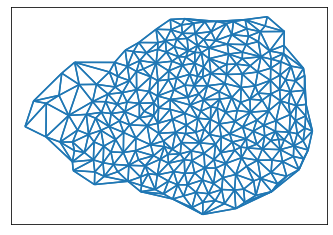

In [33]:
sm.plot('footpaths')

# ACCESS AND EGRESS

In [34]:
threshold = 200
sm.preparation_ntlegs(
    short_leg_speed=3,
    long_leg_speed=7,
    threshold=threshold,
    zone_to_transit=True,
    zone_to_road=True,
    n_ntlegs=5
)

Monitore the zone_to_transit durations by plotting:
1. time vs distance for all zone_to_transit links
2. speed vs distance for all zone_to_transit links
3. add the distance threshold as a vertical line on the plots

# TO ZIP

Export `sm` to a zip file named `walk_model.zip` in the folder `training_folder + 'model/base/'`

# PLOT 
## clustering

In [39]:
sm_3857 = sm.change_epsg(epsg=3857, coordinates_unit='meter')

Reprojecting model from epsg 2154 to epsg 3857: 100%|██████████████████████████████████| 36/36 [00:16<00:00,  2.19it/s]


In [46]:
def plot_clustering(sm, figsize=[25, 25],url=None, *args, **kwargs):
    fig, ax_array = plt.subplots(2, 2,  figsize=figsize, tight_layout=True) 
    plot = sm.plot(
        'disaggregated_nodes', markersize=10, color='green',
        basemap_url=url, title="Original Stops", fontsize=36, ax=ax_array[0][0],
    )
    plot = sm.plot(
        'node_parenthood', linewidth=1,
        ax=sm.plot('disaggregated_nodes',  markersize=10, color='green', ax=ax_array[0][1]),
        basemap_url=url, title="Stop Clusters", fontsize=36
    )
    plot = sm.plot(
        'nodes', color='green', markersize=10,
        ax=sm.plot('node_clusters', alpha=0.25, edgecolor='black', ax=ax_array[1][0]),
        basemap_url=url, title="Stop Clusters", fontsize=36
    )
    plot = sm.plot(
        'nodes', color='green', markersize=50, basemap_url=url,
        title="Aggregated stops", fontsize=36, ax=ax_array[1][1]
    )
    return fig

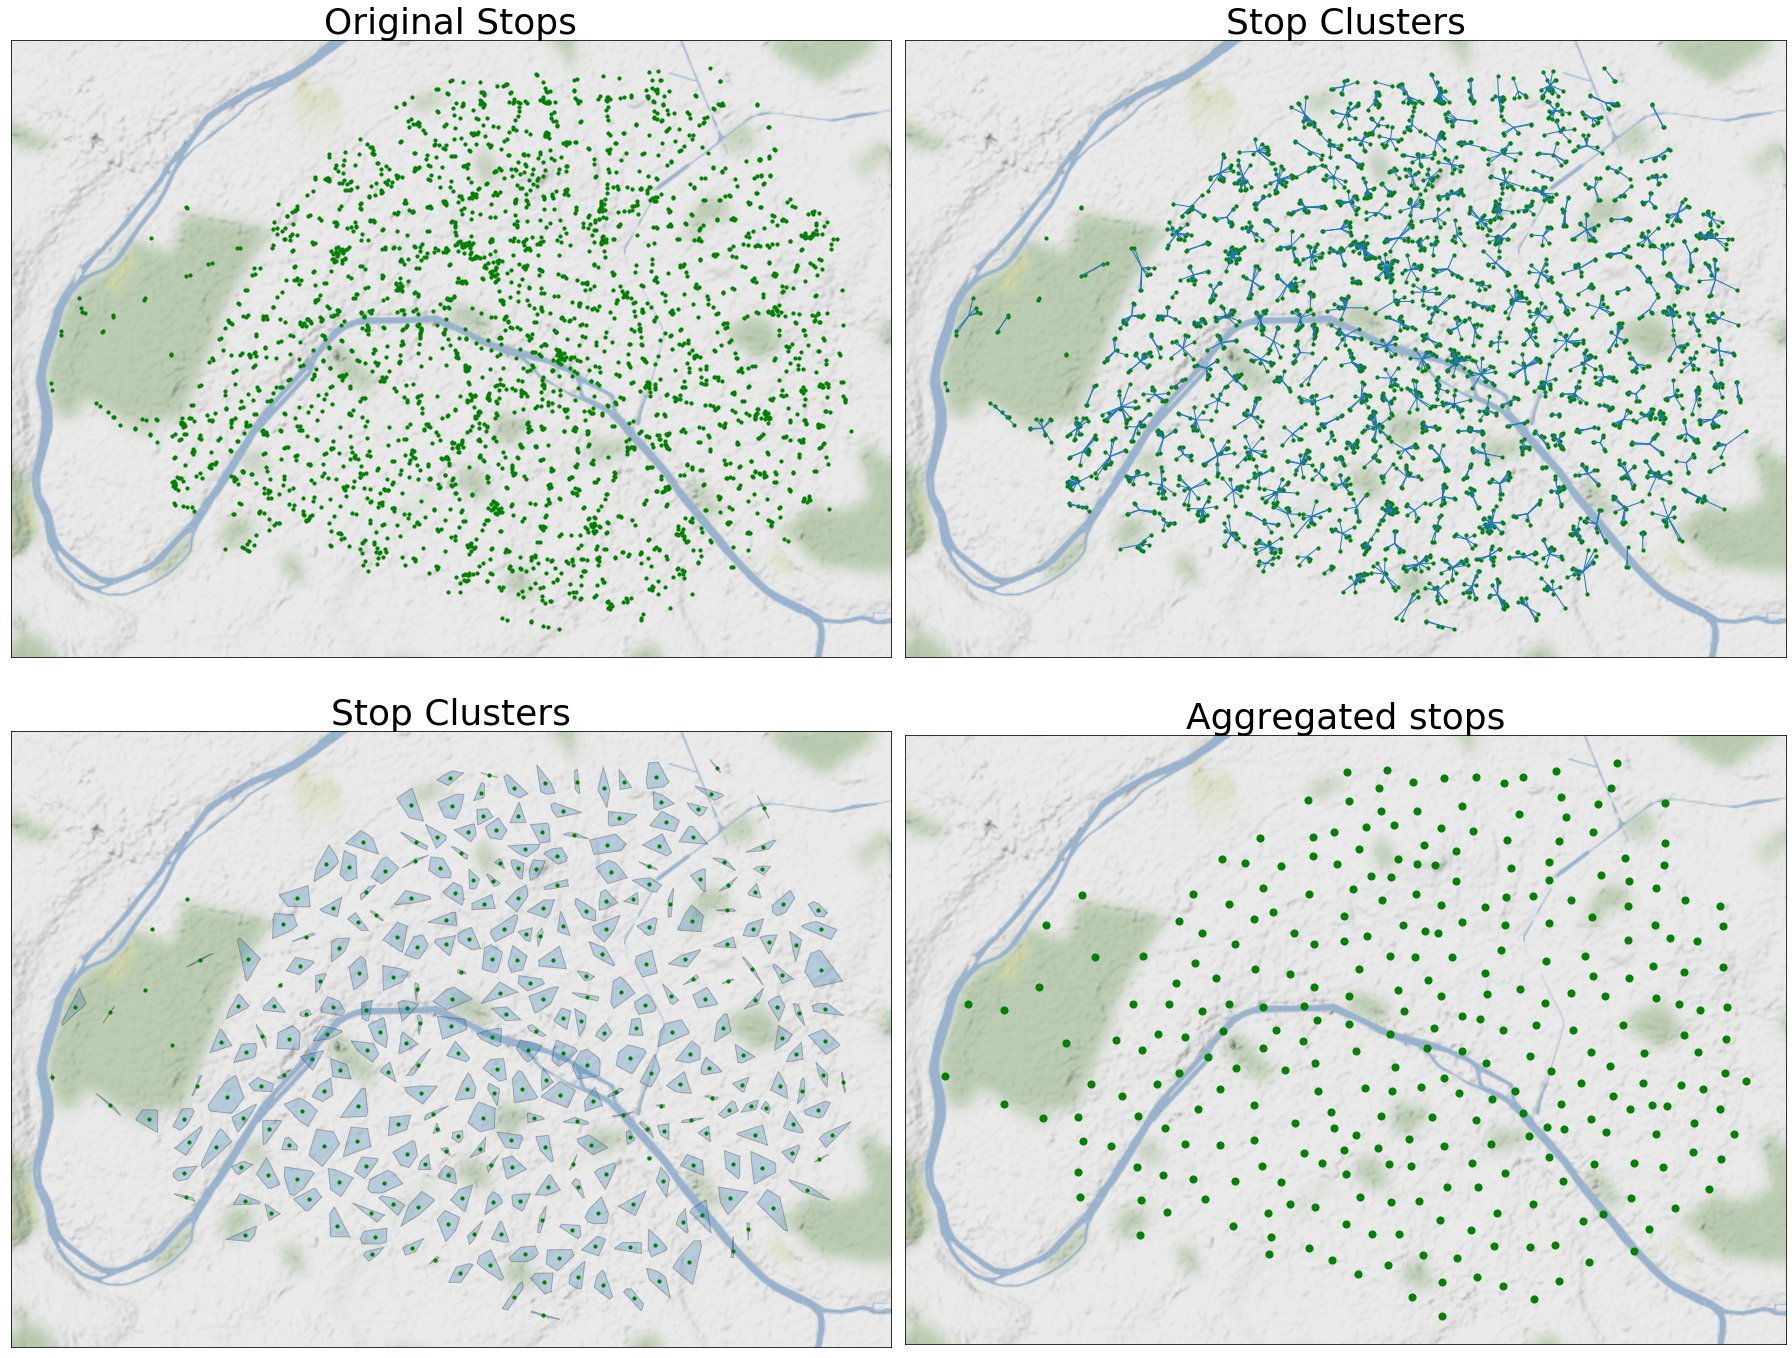

In [47]:
if manual:
    fig = plot_clustering(sm_3857, url='http://tile.stamen.com/terrain-background/tileZ/tileX/tileY.png')

## walk model

In [48]:
def plot_walkmodel(sm, figsize=[25, 25],url=None, *args, **kwargs):
    fig, ax_array = plt.subplots(2, 2,  figsize=figsize, tight_layout=True)
    plot = sm.plot('centroids', color='red', markersize=100,
        ax=sm.plot('nodes', markersize=10, color='red',
            ax=sm.plot('zone_to_transit', linewidth=1,
                      ax=sm.plot('zones', linewidth=1, alpha=1, edgecolor='black', color='none', 
                                ax=sm.plot('footpaths', alpha=0, ax=ax_array[0][0])))
        ),
        basemap_url=url,
        title="Acces and Egress links (Zone to Transit)", fontsize=36
    )
    plot = sm.plot(
        'footpaths', color=None, linewidth=1,
        ax=sm.plot('nodes', markersize=100, ax=sm.plot('zones',alpha=0, ax=ax_array[0][1])),
        basemap_url=url, title="Stops & Footpaths", fontsize=36
    )

    plot = sm.plot(
        'footpaths', color=None, linewidth=1,
        ax=sm.plot('zone_to_transit', linewidth=1,  ax=sm.plot('zones',alpha=0, ax=ax_array[1][0]) ),
        basemap_url=url,
        title="Full Pedestrian Graph (as the Crow Flies)", fontsize=36
    )
    plot = sm.plot('road_links', color='green',linewidth=0.5, ax=sm.plot(
        'road_to_transit',  linewidth=1, color='green',
        ax=sm.plot('zone_to_road', linewidth=1, color='green', ax=sm.plot('zones',alpha=0, ax=ax_array[1][1]) )),
        basemap_url=url,
        title="Full Pedestrian Graph (Walk on Road)", fontsize=36
    )
    return fig

In [ ]:
if manual:
    fig = plot_walkmodel(sm_3857, url = 'http://a.basemaps.cartocdn.com/light_nolabels/tileZ/tileX/tileY.png')

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=[17, 7])

ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='time', ax=axes[0])
ax.axvline(x=threshold, color='green')
ax.set_title('Access & egress links: time VS distance')

ax = sm.zone_to_transit.plot(kind='scatter', x='distance', y='speed', ax=axes[1])
ax.axvline(x=threshold, color='green')
ax.set_title('Access & egress links: speed VS distance')